## Generate dataset

In [ ]:
import pandas as pd
import random
import json
#Read in the o3mini first run output csv
df_clust_30 = pd.read_csv('/path/to/your/first_run_data/o3mini_high_firstrun_onlyclust30_subset_500.csv', index_col=None)
df_clust_30

,Cluster Id,Group Items
0,140557,[]
1,364575,"[[""**A. thaliana MADS-box protein(s) [protein]..."
2,384061,"[[""**Specific expression of AtBAM3 [gene]**"", ..."
3,33376,"[[""**Genetic manipulation [phenotype]**"", ""Gen..."
4,471034,"[[""**acyl CoA oxidase [enzyme]**"", ""ACYL-CoA O..."
...,...,...
495,336538,"[[""**transcription of target loci [process]**""..."
496,26885,"[[""increasing channel activity duration [pheno..."
497,162721,"[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,[]


In [2]:
df_clust_30_clusters = df_clust_30['Cluster Id'].unique()
len(df_clust_30_clusters)

500

In [ ]:
#GET INPUTs from kmeans clusters
df_kmeans = pd.read_parquet('/path/to/your/kmeans_clusters/multisect_kmeans_all_clusters.parquet',engine='pyarrow')

In [5]:
#Filter kmeans clusters to only include those that are in the df_clust_30 

kmeans_dict = {}

for key in df_clust_30_clusters:
    kmeans_dict[key] = df_kmeans[df_kmeans['cluster_id'] == key]['node_ids_in_cluster'].values[0]


In [6]:
kmeans_dict[140557]

array(['AtJMT ectopic expression [gene]',
       'ectopic expression of MsLBD48 [gene]',
       'ectopic expression of MtGSTF7 [treatment]',
       'ectopic expression of AtGPA1(Q222L) [process]',
       'Ectopic expression of myc-tagged ICE1FL [gene]',
       'ectopic overexpression [metabolite]',
       'ectopic expression of EXPA9 [gene]',
       'Ectopic overexpression of ICK/KRPs [gene]',
       'ectopic AtGRP7 expression [phenotype]',
       'ectopic overexpression of AAK6 [gene]',
       'Ectopic expression of PmDAM6 [gene]',
       'ectopic expression of StMADS16 [gene]',
       'ectopic expression of GhKIS13A1 [gene]',
       'ectopic expression of MdMAX2 [gene]',
       'Ectopic expression of MnMADS33 [gene]',
       'Ectopic expression of MnMADS50 [gene]',
       'ectopic expression of CmMYB012 [process]',
       'Ectopic expression of GsCML27 [gene]',
       'ectopic overexpression of MCA1 [gene]',
       'ectopic KRP3 and KRP5 expression [phenotype]',
       'ectopic GA3ox

In [129]:
len(kmeans_dict)

100

In [ ]:
#This is a script that loads a pandas dataframe from csv, converts the string formatted as a list into a list of lists. The list of lists is then flattened into a single list.
import numpy as np
import pandas as pd
import random
import json
#Read in the o3mini first run output csv
df_clust_30 = pd.read_csv('/path/to/your/first_run_output/o3mini_high_firstrun_onlyclust30_subset_500.csv', index_col=None)
#df_clust_30 = df_clust_30.sample(n=100, random_state=1).reset_index(drop=True)
#rename the column "Entity Name" to "Entity" and "Group Items" to "output"
df_clust_30 = df_clust_30.rename(columns={"Group Items": "Output"})

# Convert the string formatted as a list into a list of lists
df_clust_30['Output'] = df_clust_30['Output'].apply(lambda x: eval(x))

# put kmeans_dict into a new column called Input
df_clust_30['Input'] = df_clust_30['Cluster Id'].apply(lambda x: kmeans_dict[x])

#randomize the order of the single list
#df_clust_30['Input'] = df_clust_30['Input'].apply(lambda x: random.sample(x, len(x)))
#df_clust_30 = df_clust_30[df_clust_30['Input'].apply(len) < 30]
# make a new column, where internal lists of length 1 are removed 
df_clust_30['Output>1'] = df_clust_30['Output'].apply(lambda x: [item for item in x if len(item) > 1])
#create a flag column by name one_item. For each row in Output column, If length of the list in output column is less than 2, put True otherwise False.
df_clust_30['one_item'] = df_clust_30['Output>1'].apply(lambda x: True if len(x) == 0 else False)

#zip the Group_Items_no_singles with the Cluster Id
df_clust_30["Output"] = df_clust_30.apply(lambda row: {row["Cluster Id"]: row['Output']}, axis=1)
df_clust_30["Input"] = df_clust_30.apply(lambda row: {row["Cluster Id"]: row['Input']}, axis=1)
df_clust_30['Output>1'] = df_clust_30.apply(lambda row: {row["Cluster Id"]: row['Output>1']}, axis=1)


import json
import numpy as np

def safe_json_dumps(x):
    return json.dumps(x, default=lambda o: o.tolist() if isinstance(o, np.ndarray) else o)




df_clust_30["Output"] = df_clust_30["Output"].apply(safe_json_dumps)
df_clust_30["Input"] = df_clust_30["Input"].apply(safe_json_dumps)
df_clust_30["Output>1"] = df_clust_30["Output>1"].apply(safe_json_dumps)

#Change order of columns to have input, then output, then output>1, then entity name
df_clust_30 = df_clust_30[['Cluster Id', 'Input', 'Output', 'Output>1', 'one_item']]


In [8]:
df_clust_30

,Cluster Id,Input,Output,Output>1,one_item
0,140557,"{""140557"": [""AtJMT ectopic expression [gene]"",...","{""140557"": []}","{""140557"": []}",True
1,364575,"{""364575"": [""A. thaliana MS5 homologous protei...","{""364575"": [[""**A. thaliana MADS-box protein(s...","{""364575"": [[""**A. thaliana MADS-box protein(s...",False
2,384061,"{""384061"": [""expression of SIZ1 gene(s) [gene]...","{""384061"": [[""**Specific expression of AtBAM3 ...","{""384061"": [[""**Specific expression of AtBAM3 ...",False
3,33376,"{""33376"": [""genetic engineering [phenotype]"", ...","{""33376"": [[""**Genetic manipulation [phenotype...","{""33376"": [[""**Genetic manipulation [phenotype...",False
4,471034,"{""471034"": [""acyl CoA oxidase [enzyme]"", ""ACYL...","{""471034"": [[""**acyl CoA oxidase [enzyme]**"", ...","{""471034"": [[""**acyl CoA oxidase [enzyme]**"", ...",False
...,...,...,...,...,...
495,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False
496,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False
497,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False
498,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True


In [ ]:
#This is a script that loads a pandas dataframe from csv, converts the string formatted as a list into a list of lists. The list of lists is then flattened into a single list.

import pandas as pd
import random
import json
#Read in the o3mini first run output csv
df = pd.read_csv('./path/to/the/file/o3mini_maxclust_80_subset_random_1000_nocutoff.csv', index_col=None)

#rename the column "Entity Name" to "Entity" and "Group Items" to "output"
df = df.rename(columns={"Group Items": "Output"})

# Convert the string formatted as a list into a list of lists
df['Output'] = df['Output'].apply(lambda x: eval(x))

# Flatten the list of lists into a single list
df['Input'] = df['Output'].apply(lambda x: [item.strip("*") for sublist in x for item in sublist])

#randomize the order of the single list
df['Input'] = df['Input'].apply(lambda x: random.sample(x, len(x)))
df = df[df['Input'].apply(len) <= 30]
# make a new column, where internal lists of length 1 are removed 
df['Output>1'] = df['Output'].apply(lambda x: [item for item in x if len(item) > 1])
#create a flag column by name one_item. For each row in Output column, If length of the list in output column is less than 2, put True otherwise False.
df['one_item'] = df['Output>1'].apply(lambda x: True if len(x) == 0 else False)

#zip the Group_Items_no_singles with the Entity Name 
df["Output"] = df.apply(lambda row: {row["Entity Name"]: row['Output']}, axis=1)
df["Input"] = df.apply(lambda row: {row["Entity Name"]: row['Input']}, axis=1)
df['Output>1'] = df.apply(lambda row: {row["Entity Name"]: row['Output>1']}, axis=1)





#convert the columns to json strings
df["Output"] = df["Output"].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)
df["Input"] = df["Input"].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)
df["Output>1"] = df["Output>1"].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

#Change order of columns to have input, then output, then output>1, then entity name
df = df[['Entity Name', 'Input', 'Output', 'Output>1', 'one_item']]

#filter by Output>1 length of the list > 1
#use column Output, but use only the ones where it clusteres multiple items together

In [10]:
df
#note i don't really use Outputs>1 in this workflow.

,Entity Name,Input,Output,Output>1,one_item
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True
2,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False
3,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True
4,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False
5,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True
...,...,...,...,...,...
995,31615,"{""31615"": [""auxin-dependent inhibition of endo...","{""31615"": [[""auxin-mediated modulation of the ...","{""31615"": [[""auxin-dependent inhibition of end...",False
996,157227,"{""157227"": [""StSAUR [gene]"", ""ZmSAUR1 (Zea may...","{""157227"": [[""GmSAUR [gene]""], [""StSAUR [gene]...","{""157227"": [[""ZmSAUR1 (Zea mays SAURs) [gene]""...",False
997,131559,"{""131559"": [""BtuB gene(s) [gene]"", ""cytochrome...","{""131559"": [[""BtuB gene(s) [gene]""], [""BtuC ge...","{""131559"": []}",True
998,99091,"{""99091"": [""O. fragrans 'Liuyejingui' (OFL) [o...","{""99091"": [[""Genome sequencing of O. fragrans ...","{""99091"": [[""**O. fragrans 'Liuyejingui' (OFL)...",False


In [ ]:
#read in the o3-mini validation (second run) output csv
output_csv_clust_30 = pd.read_csv("./path/to/the/o3mini_second_run/o3mini_secondrun_500.csv")
output_csv_clust_30

,cluster_id,is_correct,user_prompt,clusters
0,140557,True,"This looks correct to me, output the clusters ...",[]
1,364575,True,"Great job, the clustering is correct. The firs...","[[""**A. thaliana MADS-box protein(s) [protein]..."
2,384061,False,"This looks incorrect to me, because the last c...","[[""**Specific expression of AtBAM3 [gene]**"", ..."
3,33376,False,This looks incorrect to me because the cluster...,"[[""**Genetic manipulation [phenotype]**"", ""Gen..."
4,471034,True,This looks correct to me—all entities in each ...,"[[""**acyl CoA oxidase [enzyme]**"", ""ACYL-CoA O..."
...,...,...,...,...
495,336538,True,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""..."
496,26885,True,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno..."
497,162721,True,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,True,"Great job, that looks correct because there ar...",[]


In [13]:
output_csv_clust_30

,cluster_id,is_correct,user_prompt,clusters
0,140557,True,"This looks correct to me, output the clusters ...",[]
1,364575,True,"Great job, the clustering is correct. The firs...","[[""**A. thaliana MADS-box protein(s) [protein]..."
2,384061,False,"This looks incorrect to me, because the last c...","[[""**Specific expression of AtBAM3 [gene]**"", ..."
3,33376,False,This looks incorrect to me because the cluster...,"[[""**Genetic manipulation [phenotype]**"", ""Gen..."
4,471034,True,This looks correct to me—all entities in each ...,"[[""**acyl CoA oxidase [enzyme]**"", ""ACYL-CoA O..."
...,...,...,...,...
495,336538,True,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""..."
496,26885,True,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno..."
497,162721,True,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,True,"Great job, that looks correct because there ar...",[]


In [14]:
#clusterids into a list
clusterids_from_30 = output_csv_clust_30['cluster_id'].tolist()

In [15]:
output_csv = pd.read_csv("./o3mini_val_outs/o3mini_1k.csv")
clusterids_from_80 = output_csv['cluster_id'].tolist()

In [16]:
#find common cluster ids
common_cluster_ids = list(set(clusterids_from_30).intersection(clusterids_from_80))

In [17]:
common_cluster_ids

[25469, 76278]

In [18]:
# remove the common from all the dataframes
df_clust_30 = df_clust_30[~df_clust_30['Cluster Id'].isin(common_cluster_ids)]
df = df[~df['Entity Name'].isin(common_cluster_ids)]

#change the column name to Entity Name
df_clust_30 = df_clust_30.rename(columns={"Cluster Id": "Entity Name"})

#concatenate the two dataframes
df_final = pd.concat([df, df_clust_30], axis=0)


In [19]:
df_final

,Entity Name,Input,Output,Output>1,one_item
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True
2,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False
3,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True
4,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False
5,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True
...,...,...,...,...,...
495,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False
496,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False
497,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False
498,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True


In [20]:
# remove common cluster ids from the output csv and output_csv_clust_30
output_csv = output_csv[~output_csv['cluster_id'].isin(common_cluster_ids)]
output_csv_clust_30 = output_csv_clust_30[~output_csv_clust_30['cluster_id'].isin(common_cluster_ids)]

#concatenate the two dataframes
output_final = pd.concat([output_csv, output_csv_clust_30], axis=0)

In [21]:
output_final

,cluster_id,is_correct,user_prompt,clusters
0,58963,True,"Great job, that looks correct because each res...",[]
1,22775,True,"Great job, the clusters appear to be correctly...","[[""**transportation [phenotype]**"", ""transport..."
2,22996,False,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va..."
3,100116,True,"This looks correct to me, as the grouping foll...",[]
4,133255,True,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""..."
...,...,...,...,...
495,336538,True,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""..."
496,26885,True,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno..."
497,162721,True,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,True,"Great job, that looks correct because there ar...",[]


In [22]:
df_final = df_final.reset_index(drop=True)
df_final

,Entity Name,Input,Output,Output>1,one_item
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True
...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True


In [23]:
#create a dictionary from output_final df with cluster_id as key and cluster column as value

output_final_dict = dict(zip(output_final['cluster_id'], output_final['clusters']))
output_final_dict

{58963: '[]',
 22775: '[["**transportation [phenotype]**", "transportion [phenotype]"], ["transport within the plant(s) [phenotype]", "transport through the plant(s) [phenotype]", "**transport in planta [phenotype]**"], ["secondary metabolites transportation [phenotype]", "**secondary metabolite transport [phenotype]**"], ["**photoassimilate transport [phenotype]**", "transport of photo-assimilates [phenotype]"], ["**enzyme transport [phenotype]**", "transport of enzymes [phenotype]"]]',
 22996: '[["**transpiration and stomatal conductance values [phenotype]**", "E and g s [phenotype]"], ["**stomatal conductance measurements [phenotype]**", "measured stomatal conductance [phenotype]", "Conductance measurements [phenotype]", "stomatal conductances [phenotype]", "direct measurements of g s [phenotype]", "stomatal conductance analyses [phenotype]", "conductance levels [phenotype]", "measuring stomatal conductance [phenotype]"], ["kinetic stomatal conductance analyses [phenotype]", "**time

In [24]:
#print first row of the Input column
list(eval(df_final['Input'][0]).values())[0]

['Gardea-Torresdey et al. [researcher]', 'Barrena et al. [researcher]']

In [25]:
df_final

,Entity Name,Input,Output,Output>1,one_item
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True
...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True


In [26]:
#map the Entity Name to the output_final_dict and put the clusters in a new column called Corrected Clusters

df_final['Corrected Clusters'] = df_final['Entity Name'].map(output_final_dict)
df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[]
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,"[[""**transpiration and stomatal conductance va..."
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[]
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[]
...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[""**transcription of target loci [process]**""..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,"[[""increasing channel activity duration [pheno..."
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[""dicot group [organism]"", ""**Dicotyledones [..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[]


In [27]:
import pandas as pd

def safe_extract(x):
    # Check if x is missing or empty
    if pd.isna(x) or (isinstance(x, str) and x.strip() == ""):
        return None
    try:
        # Evaluate the outer string to get the dictionary
        d = eval(x)
    except Exception as e:
        print(f"Outer eval error for x = {x}: {e}")
        return None
    
    if not d:
        return None
    
    try:
        # Get the first value from the dictionary
        inner_val = list(d.values())[0]
    except Exception as e:
        print(f"Error getting inner value from {d}: {e}")
        return None

    # If the inner value is empty, return None
    if inner_val == "" or inner_val is None:
        return None

    # If inner_val is a string, try to evaluate it
    if isinstance(inner_val, str):
        try:
            # Attempt to evaluate inner_val
            result = eval(inner_val)
        except Exception as e:
            print(f"Inner eval error for inner_val = {inner_val}: {e}")
            # If eval fails, just return the original string
            result = inner_val
        return result
    else:
        # If it's not a string, assume it's already in the correct format
        return inner_val

# Apply the function to create a new column
df_final['Input_lists'] = df_final['Input'].apply(safe_extract)

In [28]:
df_final.columns

Index(['Entity Name', 'Input', 'Output', 'Output>1', 'one_item',
       'Corrected Clusters', 'Input_lists'],
      dtype='object')

In [29]:
df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena..."
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,"[[""**transpiration and stomatal conductance va...","[engineering stomatal conductance [phenotype],..."
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members..."
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ..."
...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[""**transcription of target loci [process]**""...","[Transcription from the IGS [process], 35S pro..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,"[[""increasing channel activity duration [pheno...",[elementary rate constant of channel opening (...
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[""dicot group [organism]"", ""**Dicotyledones [...","[dicot group [organism], Monocot group [organi..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[],"[3934 transcripts [metabolite], 742 transcript..."


In [33]:
df_final.columns

Index(['Entity Name', 'Input', 'Output', 'Output>1', 'one_item',
       'Corrected Clusters', 'Input_lists', 'Output_lists'],
      dtype='object')

In [30]:
#convert Corrected Clusters from sting to list of lists using eval
df_final['Corrected Clusters'] = df_final['Corrected Clusters'].apply(lambda x: eval(x))
df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena..."
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],..."
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members..."
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ..."
...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[],"[3934 transcripts [metabolite], 742 transcript..."


In [31]:
# flatten the Corrected Clusters and strip the ** from it and put it to a new column called Output_lists
df_final['Output_flattened_lists'] = df_final['Corrected Clusters'].apply(lambda x: [item.strip("*") for sublist in x for item in sublist])
df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[]
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[]
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[]
...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[],"[3934 transcripts [metabolite], 742 transcript...",[]


In [32]:
df_final.columns

Index(['Entity Name', 'Input', 'Output', 'Output>1', 'one_item',
       'Corrected Clusters', 'Input_lists', 'Output_flattened_lists'],
      dtype='object')

In [38]:
df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists,clusters_missing_added
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[],"[[Gardea-Torresdey et al. [researcher]], [Barr..."
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...,[[**transpiration and stomatal conductance val...
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[],"[[modern clade [gene]], [modern clade WOX memb..."
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[],"[[fc2 phenotypes [phenotype]], [white F2 proge..."
...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans...","[[**transcription of target loci [process]**, ..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi...","[[dicot group [organism], **Dicotyledones [org..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[],"[3934 transcripts [metabolite], 742 transcript...",[],"[[3934 transcripts [metabolite]], [742 transcr..."


In [35]:
df_final.columns

Index(['Entity Name', 'Input', 'Output', 'Output>1', 'one_item',
       'Corrected Clusters', 'Input_lists', 'Output_flattened_lists'],
      dtype='object')

In [36]:
import copy

def combine_nodes(row):
    input_list = row['Input_lists']
    output_list = copy.deepcopy(row['Corrected Clusters'])
    flattened_output = [item.strip("**") for item in row['Output_flattened_lists']]
    remaining_nodes = [node for node in input_list if node not in flattened_output]
    for rem_node in remaining_nodes:
        output_list.append([rem_node])
    return output_list

df_final['clusters_missing_added'] = df_final.apply(combine_nodes, axis=1)

In [40]:
#print last row in clusters_missing_added column
df_final['clusters_missing_added'].iloc[-3]

[['dicot group [organism]',
  '**Dicotyledones [organism]**',
  'dicotyledonous members [organism]',
  'dicot plant(s) groups [organism]',
  'Dicotyledonae [organism]'],
 ['Monocot group [organism]',
  '**Monocotyledones [organism]**',
  'Monocots species [organism]',
  'monocotyledonous members [organism]',
  'monocot plant(s) groups [organism]',
  'Monocotyledonae [organism]'],
 ['dicot-monocot split [organism]'],
 ['2-8 in dicots [organism]'],
 ['a subset of dicots [organism]'],
 ['certain dicots [organism]'],
 ['basal monocot [organism]'],
 ['other monocot [organism]'],
 ['distant evolutionary association with dicotyledonous species [organism]'],
 ['+240 in dicots [organism]'],
 ['+60 in monocots [organism]'],
 ['13 monocot and dicot species [organism]'],
 ['only dicot species [organism]'],
 ['several monocots [organism]'],
 ['monocot/dicot plant(s) [organism]'],
 ['five dicots and one monocot [organism]'],
 ['25 monocots [organism]'],
 ['1 monocot [organism]'],
 ['0.78 between dic

In [42]:
df_final['clusters_missing_added_dict'] = df_final.apply(lambda row: {row["Entity Name"]:row['clusters_missing_added']}, axis=1)
import json
import numpy as np

def safe_json_dumps(x):
    return json.dumps(x, default=lambda o: o.tolist() if isinstance(o, np.ndarray) else o)

df_final['clusters_missing_added_dict'] = df_final['clusters_missing_added_dict'].apply(safe_json_dumps)

df_final

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists,clusters_missing_added,clusters_missing_added_dict
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[],"[[Gardea-Torresdey et al. [researcher]], [Barr...","{""58963"": [[""Gardea-Torresdey et al. [research..."
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...,[[**transpiration and stomatal conductance val...,"{""22996"": [[""**transpiration and stomatal cond..."
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[],"[[modern clade [gene]], [modern clade WOX memb...","{""100116"": [[""modern clade [gene]""], [""modern ..."
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene..."
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[],"[[fc2 phenotypes [phenotype]], [white F2 proge...","{""2276"": [[""fc2 phenotypes [phenotype]""], [""wh..."
...,...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans...","[[**transcription of target loci [process]**, ...","{""336538"": [[""**transcription of target loci [..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...,"{""26885"": [[""increasing channel activity durat..."
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi...","[[dicot group [organism], **Dicotyledones [org...","{""162721"": [[""dicot group [organism]"", ""**Dico..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,[],"[3934 transcripts [metabolite], 742 transcript...",[],"[[3934 transcripts [metabolite]], [742 transcr...","{""441566"": [[""3934 transcripts [metabolite]""],..."


In [43]:
#print first row in the clusters_missing_added_dict column
print(df_final['clusters_missing_added_dict'][0])

{"58963": [["Gardea-Torresdey et al. [researcher]"], ["Barrena et al. [researcher]"]]}


In [39]:
df_final.columns

Index(['Entity Name', 'Input', 'Output', 'Output>1', 'one_item', 'Input_lists',
       'Output_lists', 'Output_flattened_lists', 'clusters_missing_added',
       'clusters_missing_added_dict'],
      dtype='object')

In [48]:
df_final

,Entity Name,Input,Output,Output>1,one_item,Input_lists,Output_lists,Output_flattened_lists,clusters_missing_added,clusters_missing_added_dict
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,"[Gardea-Torresdey et al. [researcher], Barrena...","[[Gardea-Torresdey et al. [researcher]], [Barr...","[Gardea-Torresdey et al. [researcher], Barrena...","[[Gardea-Torresdey et al. [researcher]], [Barr...","{""58963"": [[""Gardea-Torresdey et al. [research..."
1,22996,"{""22996"": [""stomatal conductance measurements ...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[stomatal conductance measurements [phenotype]...,[[**transpiration and stomatal conductance val...,[**transpiration and stomatal conductance valu...,[[**transpiration and stomatal conductance val...,"{""22996"": [[""**transpiration and stomatal cond..."
2,100116,"{""100116"": [""modern clade [gene]"", ""Clade SH [...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,"[modern clade [gene], Clade SH [clade], Clade ...","[[Clade M [clade]], [Clade SL [clade]], [Clade...","[Clade M [clade], Clade SL [clade], Clade SH [...","[[Clade M [clade]], [Clade SL [clade]], [Clade...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c..."
3,133255,"{""133255"": [""PLSP2 [gene]"", ""ptLPD2 [gene]"", ""...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[PLSP2 [gene], ptLPD2 [gene], LPP gamma [gene]...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[**PLSP2A [gene]**, PLSP2A gene(s) [gene], PLS...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene..."
4,2276,"{""2276"": [""white panicle phenotype in F1 proge...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[white panicle phenotype in F1 progeny [phenot...,"[[F1 trichome phenotype [phenotype]], [near-fu...","[F1 trichome phenotype [phenotype], near-full ...","[[F1 trichome phenotype [phenotype]], [near-fu...","{""2276"": [[""F1 trichome phenotype [phenotype]""..."
...,...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[Transcription from the IGS [process], 35S pro...","[[**transcription of target loci [process]**, ...","[**transcription of target loci [process]**, t...","[[**transcription of target loci [process]**, ...","{""336538"": [[""**transcription of target loci [..."
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[elementary rate constant of channel opening (...,[[increasing channel activity duration [phenot...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...,"{""26885"": [[""increasing channel activity durat..."
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[dicot group [organism], Monocot group [organi...","[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], **Dicotyledones [orga...","[[dicot group [organism], **Dicotyledones [org...","{""162721"": [[""dicot group [organism]"", ""**Dico..."
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,"[3934 transcripts [metabolite], 742 transcript...",[],[],"[[3934 transcripts [metabolite]], [742 transcr...","{""441566"": [[""3934 transcripts [metabolite]""],..."


In [44]:
#calculate the length of the Input_lists column
df_final['Input_length'] = df_final['Input_lists'].apply(lambda x: len(x))

In [45]:
df_final['Input_length'].value_counts()

Input_length
30    507
2      66
3      55
4      54
7      50
5      50
8      49
6      42
9      32
11     31
10     30
12     30
17     28
13     27
14     26
16     25
19     25
21     25
15     24
18     22
23     16
26     15
22     14
20     14
29     12
28     11
24     10
27      9
25      8
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

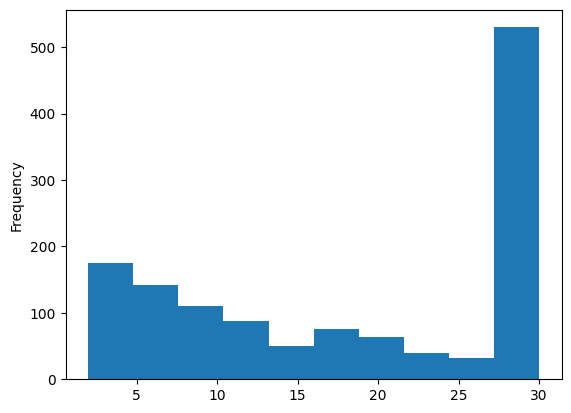

In [47]:
df_final['Input_length'].plot(kind='hist')


In [160]:
df_final

,Entity Name,Input,Output,Output>1,one_item,Input_lists,Input_length
0,58963,"{""58963"": [""Barrena et al. [researcher]"", ""Gar...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,"[Barrena et al. [researcher], Gardea-Torresdey...",2
1,22996,"{""22996"": [""measured stomatal conductance [phe...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,"[measured stomatal conductance [phenotype], re...",25
2,100116,"{""100116"": [""modern clade [gene]"", ""Clade SH [...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,"[modern clade [gene], Clade SH [clade], modern...",6
3,133255,"{""133255"": [""HvLPP2 [gene]"", ""PLSP2 [gene]"", ""...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[HvLPP2 [gene], PLSP2 [gene], cyanobacterial L...",17
4,2276,"{""2276"": [""most of the S1 progeny [phenotype]""...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,"[most of the S1 progeny [phenotype], white F2 ...",15
...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[Transcription from the IGS [process], 35S pro...",30
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[elementary rate constant of channel opening (...,30
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[dicot group [organism], Monocot group [organi...",30
1305,441566,"{""441566"": [""3934 transcripts [metabolite]"", ""...","{""441566"": []}","{""441566"": []}",True,"[3934 transcripts [metabolite], 742 transcript...",30


In [48]:
df = df_final.copy()
output_csv = output_final.copy()

In [49]:
output_final

,cluster_id,is_correct,user_prompt,clusters
0,58963,True,"Great job, that looks correct because each res...",[]
1,22775,True,"Great job, the clusters appear to be correctly...","[[""**transportation [phenotype]**"", ""transport..."
2,22996,False,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va..."
3,100116,True,"This looks correct to me, as the grouping foll...",[]
4,133255,True,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""..."
...,...,...,...,...
495,336538,True,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""..."
496,26885,True,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno..."
497,162721,True,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,True,"Great job, that looks correct because there ar...",[]


In [55]:
df

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists,clusters_missing_added,clusters_missing_added_dict,Input_length,user_prompt,o3_corrected_cluster,is_correct
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[],"[[Gardea-Torresdey et al. [researcher]], [Barr...","{""58963"": [[""Gardea-Torresdey et al. [research...",2,"Great job, that looks correct because each res...",[],True
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...,[[**transpiration and stomatal conductance val...,"{""22996"": [[""**transpiration and stomatal cond...",25,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va...",False
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[],"[[modern clade [gene]], [modern clade WOX memb...","{""100116"": [[""modern clade [gene]""], [""modern ...",6,"This looks correct to me, as the grouping foll...",[],True
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",17,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""...",True
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[],"[[fc2 phenotypes [phenotype]], [white F2 proge...","{""2276"": [[""fc2 phenotypes [phenotype]""], [""wh...",15,"Great job, your clustering is correct. Each en...",[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans...","[[**transcription of target loci [process]**, ...","{""336538"": [[""**transcription of target loci [...",30,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""...",True
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...,"{""26885"": [[""increasing channel activity durat...",30,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno...",True
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi...","[[dicot group [organism], **Dicotyledones [org...

In [63]:
# remove the rows where the Entity Name is 73713, 97119, 159677,664. I found some issues with the correctness of the clusters for these rows.

df = df[~df['Entity Name'].isin([73713, 97119, 159677,664])]

df

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists,clusters_missing_added,clusters_missing_added_dict,Input_length,user_prompt,o3_corrected_cluster,is_correct
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[],"[[Gardea-Torresdey et al. [researcher]], [Barr...","{""58963"": [[""Gardea-Torresdey et al. [research...",2,"Great job, that looks correct because each res...",[],True
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...,[[**transpiration and stomatal conductance val...,"{""22996"": [[""**transpiration and stomatal cond...",25,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va...",False
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[],"[[modern clade [gene]], [modern clade WOX memb...","{""100116"": [[""modern clade [gene]""], [""modern ...",6,"This looks correct to me, as the grouping foll...",[],True
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",17,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""...",True
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[],"[[fc2 phenotypes [phenotype]], [white F2 proge...","{""2276"": [[""fc2 phenotypes [phenotype]""], [""wh...",15,"Great job, your clustering is correct. Each en...",[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans...","[[**transcription of target loci [process]**, ...","{""336538"": [[""**transcription of target loci [...",30,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""...",True
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...,"{""26885"": [[""increasing channel activity durat...",30,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno...",True
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi...","[[dicot group [organism], **Dicotyledones [org...

In [64]:
output_csv = output_csv[~output_csv['cluster_id'].isin([73713, 97119, 159677,664])]
output_csv

,cluster_id,is_correct,user_prompt,clusters
0,58963,True,"Great job, that looks correct because each res...",[]
1,22775,True,"Great job, the clusters appear to be correctly...","[[""**transportation [phenotype]**"", ""transport..."
2,22996,False,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va..."
3,100116,True,"This looks correct to me, as the grouping foll...",[]
4,133255,True,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""..."
...,...,...,...,...
495,336538,True,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""..."
496,26885,True,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno..."
497,162721,True,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [..."
498,441566,True,"Great job, that looks correct because there ar...",[]


In [67]:
df_train = df.copy()
df_train

,Entity Name,Input,Output,Output>1,one_item,Corrected Clusters,Input_lists,Output_flattened_lists,clusters_missing_added,clusters_missing_added_dict,Input_length,user_prompt,o3_corrected_cluster,is_correct
0,58963,"{""58963"": [""Gardea-Torresdey et al. [researche...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,[],"[Gardea-Torresdey et al. [researcher], Barrena...",[],"[[Gardea-Torresdey et al. [researcher]], [Barr...","{""58963"": [[""Gardea-Torresdey et al. [research...",2,"Great job, that looks correct because each res...",[],True
1,22996,"{""22996"": [""engineering stomatal conductance [...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,[[**transpiration and stomatal conductance val...,"[engineering stomatal conductance [phenotype],...",[transpiration and stomatal conductance values...,[[**transpiration and stomatal conductance val...,"{""22996"": [[""**transpiration and stomatal cond...",25,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va...",False
2,100116,"{""100116"": [""modern clade [gene]"", ""modern cla...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,[],"[modern clade [gene], modern clade WOX members...",[],"[[modern clade [gene]], [modern clade WOX memb...","{""100116"": [[""modern clade [gene]""], [""modern ...",6,"This looks correct to me, as the grouping foll...",[],True
3,133255,"{""133255"": [""PLSP2 [gene]"", ""PLSP2A gene(s) [g...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","[PLSP2 [gene], PLSP2A gene(s) [gene], cyanobac...","[PLSP2A [gene], PLSP2A gene(s) [gene], LPP gam...","[[**PLSP2A [gene]**, PLSP2A gene(s) [gene]], [...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",17,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""...",True
4,2276,"{""2276"": [""fc2 phenotypes [phenotype]"", ""white...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,[],"[fc2 phenotypes [phenotype], white F2 progeny ...",[],"[[fc2 phenotypes [phenotype]], [white F2 proge...","{""2276"": [[""fc2 phenotypes [phenotype]""], [""wh...",15,"Great job, your clustering is correct. Each en...",[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""Transcription from the IGS [proce...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,"[[**transcription of target loci [process]**, ...","[Transcription from the IGS [process], 35S pro...","[transcription of target loci [process], trans...","[[**transcription of target loci [process]**, ...","{""336538"": [[""**transcription of target loci [...",30,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""...",True
1303,26885,"{""26885"": [""elementary rate constant of channe...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,[[increasing channel activity duration [phenot...,[elementary rate constant of channel opening (...,[increasing channel activity duration [phenoty...,[[increasing channel activity duration [phenot...,"{""26885"": [[""increasing channel activity durat...",30,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno...",True
1304,162721,"{""162721"": [""dicot group [organism]"", ""Monocot...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"[[dicot group [organism], **Dicotyledones [org...","[dicot group [organism], Monocot group [organi...","[dicot group [organism], Dicotyledones [organi...","[[dicot group [organism], **Dicotyledones [org...

In [68]:
df_test = pd.read_csv('gpt_final_outs/o3mini_maxclust80_subset_100.csv')
#change Group Items to o3_corrected_cluster
df_test = df_test.rename(columns={"Group Items": "o3_corrected_cluster"})
df_test

,Cluster Id,o3_corrected_cluster
0,148651,[]
1,74502,[]
2,128232,"[[""**coadaptation between codon usage and tRNA..."
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig..."
4,161400,"[[""**cytosolic PPi level [metabolite]**"", ""cyt..."
...,...,...
95,136424,"[[""AtFC1 overexpression [gene]"", ""**Overexpres..."
96,57337,[]
97,68372,[]
98,134707,[]


In [69]:
#df_test cluster_ids to list
clusterids_from_test = df_test['Cluster Id'].tolist()

In [ ]:
df = pd.read_parquet('/path/to/the/kmeans_clusters/multisect_kmeans_all_clusters_max_clust_80.parquet',engine='pyarrow')

In [ ]:
# open df_test input file
df_test_input = pd.read_parquet('path/to/the/testset/multisect_kmeans_all_clusters_max_clust_80.parquet',engine='pyarrow')

In [72]:
df_test_input

,cluster_id,cluster_size,node_ids_in_cluster
0,0,78,"[in vivo pollen germination [phenotype], In vi..."
1,1,23,"[pollen-mediated gene(s) flow [phenotype], pol..."
2,2,12,"[Olive pollination [phenotype], interspecific ..."
3,3,3,"[pollen shed [phenotype], dehisced pollen [phe..."
4,4,17,"[artificial pollination [phenotype], fertiliza..."
...,...,...,...
174650,174650,20,"[glycerophosphodiester (GPD) [metabolite], Con..."
174651,174651,3,"[PG molecule [metabolite], PG molecules [metab..."
174652,174652,8,"[GPL headgroups [metabolite], Content of phosp..."
174653,174653,27,"[Glycerophospholipids (GPLs) [metabolite], GPL..."


In [73]:
#filter rows in df_test_input such that cluster_id is in clusterids_from_test
df_test_input = df_test_input[df_test_input['cluster_id'].isin(clusterids_from_test)]
df_test_input

,cluster_id,cluster_size,node_ids_in_cluster
2526,2526,17,"[Gynomonoecious sexual system [phenotype], mon..."
2655,2655,3,[self-compatible and self-incompatible plant(s...
5133,5133,2,"[carbon reallocation [phenotype], nutrient all..."
6152,6152,5,[skewness of actin fluorescence intensity [phe...
6996,6996,44,"[Juvenile phase [phenotype], Initial progress ..."
...,...,...,...
170130,170130,43,"[Inactivation of both enzymes [gene], inactiva..."
170902,170902,3,"[beta-glucosidase (PYK10) [protein], phytohorm..."
171087,171087,17,"[NDA1 [enzyme], NDA2 [enzyme], NDC1 [enzyme], ..."
172663,172663,28,"[IPA pathway [process], arachidonic acid metab..."


In [74]:
# calculate length of list in the node_ids_in_cluster column
df_test_input['node_ids_in_cluster_length'] = df_test_input['node_ids_in_cluster'].apply(lambda x: len(x))
df_test_input

/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_47074/3417746705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_input['node_ids_in_cluster_length'] = df_test_input['node_ids_in_cluster'].apply(lambda x: len(x))


,cluster_id,cluster_size,node_ids_in_cluster,node_ids_in_cluster_length
2526,2526,17,"[Gynomonoecious sexual system [phenotype], mon...",17
2655,2655,3,[self-compatible and self-incompatible plant(s...,3
5133,5133,2,"[carbon reallocation [phenotype], nutrient all...",2
6152,6152,5,[skewness of actin fluorescence intensity [phe...,5
6996,6996,44,"[Juvenile phase [phenotype], Initial progress ...",44
...,...,...,...,...
170130,170130,43,"[Inactivation of both enzymes [gene], inactiva...",43
170902,170902,3,"[beta-glucosidase (PYK10) [protein], phytohorm...",3
171087,171087,17,"[NDA1 [enzyme], NDA2 [enzyme], NDC1 [enzyme], ...",17
172663,172663,28,"[IPA pathway [process], arachidonic acid metab...",28


In [75]:
#get cluster ids where node_ids_in_cluster_length is less than or equal to 30
clusterids = df_test_input[df_test_input['node_ids_in_cluster_length'] <= 30]['cluster_id'].tolist()
clusterids

[2526,
 2655,
 5133,
 6152,
 21455,
 21800,
 25110,
 25492,
 28478,
 29369,
 30459,
 36846,
 39436,
 46386,
 48566,
 53833,
 55315,
 55450,
 56033,
 57337,
 57896,
 58056,
 59503,
 61870,
 65479,
 66138,
 68372,
 73703,
 74502,
 74533,
 78279,
 80794,
 83575,
 85099,
 85385,
 89483,
 90053,
 97859,
 101313,
 106534,
 107419,
 107990,
 108928,
 110015,
 113112,
 113676,
 115553,
 116499,
 118851,
 119483,
 121360,
 123413,
 126445,
 127813,
 128232,
 130270,
 131838,
 133284,
 135169,
 138622,
 138988,
 142908,
 143574,
 148651,
 148871,
 150159,
 154413,
 154825,
 155437,
 158067,
 159130,
 161334,
 166704,
 166812,
 168035,
 170902,
 171087,
 172663]

In [76]:
len(clusterids)

78

In [77]:
#now filter rows in df_test such that cluster_id is in clusterids
df_test = df_test[df_test['Cluster Id'].isin(clusterids)]

In [78]:
df_test

,Cluster Id,o3_corrected_cluster
0,148651,[]
1,74502,[]
2,128232,"[[""**coadaptation between codon usage and tRNA..."
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig..."
5,21800,[]
...,...,...
93,53833,[]
94,131838,"[[""**High affinity potassium transporters (HKT..."
96,57337,[]
97,68372,[]


In [79]:
#map the node_ids_in_cluster column from df_test_input to df_test
df_test['node_ids_in_cluster'] = df_test['Cluster Id'].map(df_test_input.set_index('cluster_id')['node_ids_in_cluster'])

/var/folders/28/b8d1h3952xj9bg__2x97mt6r0000gn/T/ipykernel_47074/2640712561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['node_ids_in_cluster'] = df_test['Cluster Id'].map(df_test_input.set_index('cluster_id')['node_ids_in_cluster'])


In [80]:
#rename the node_ids_in_cluster column to Input
df_test = df_test.rename(columns={"node_ids_in_cluster": "Input"})
df_test

,Cluster Id,o3_corrected_cluster,Input
0,148651,[],"[78 NPF gene(s) [gene], 40 NPF members [gene],..."
1,74502,[],[the ABA-binding properties of these protein(s...
2,128232,"[[""**coadaptation between codon usage and tRNA...",[coadaptation between codon usage and tRNA ava...
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig...","[pSPCH::nucGFP [gene], pSPCH::SPCH-GFP [gene],..."
5,21800,[],[functional diversification in woody perennial...
...,...,...,...
93,53833,[],"[Poplar VND homologs [gene], DcMYB113 of Daucu..."
94,131838,"[[""**High affinity potassium transporters (HKT...",[High affinity potassium transporters (HKTs) [...
96,57337,[],"[BPpro:SkKNOX1 [gene], BPpro:SkKNOX2 [gene], B..."
97,68372,[],"[wild-type PP2Cs [protein], AtPP2Cs [protein],..."


In [81]:
len(df_train), len(df_test)

(1306, 78)

In [83]:
import ast

def split_dict(d, chunk_size=100):
    keys = list(d.keys())
    chunks = []
    for i in range(0, len(keys), chunk_size):
        chunk_keys = keys[i:i+chunk_size]
        chunk_dict = {k: d[k] for k in chunk_keys}
        chunks.append(chunk_dict)
    return chunks

def flatten_bracketed_strings(value_list):
    """
    Takes a list. For each item:
      - If item is a string that looks like '[...]', parse it and extend the list.
      - Otherwise, keep as is.
    Returns a new flattened list.
    """
    new_list = []
    for val in value_list:
        if (
            isinstance(val, str) 
            and val.strip().startswith("[") 
            and val.strip().endswith("]")
        ):
            # Attempt to parse the bracketed string
            try:
                parsed = ast.literal_eval(val)  # convert string -> Python list
                if isinstance(parsed, list):
                    new_list.extend(parsed)  # flatten
                else:
                    # If it's not a list, just append as-is
                    new_list.append(val)
            except (SyntaxError, ValueError):
                # If parsing fails, keep original
                new_list.append(val)
        else:
            new_list.append(val)
    return new_list





In [ ]:
#For training 
df = df_train.copy() # uncomment this line for training while commeting the df_test line
#For testing
df = df_test.copy() # uncomment this line for testing while commeting the df_train line

In [99]:
df.columns  

Index(['Cluster Id', 'o3_corrected_cluster', 'Input'], dtype='object')

In [100]:
#RUN FOR df_test
#convert the Input column from ndarray to list 
df['Input'] = df['Input'].apply(lambda x: x.tolist() if hasattr(x, "tolist") else x)
df['Input']

0     [78 NPF gene(s) [gene], 40 NPF members [gene],...
1     [the ABA-binding properties of these protein(s...
2     [coadaptation between codon usage and tRNA ava...
3     [pSPCH::nucGFP [gene], pSPCH::SPCH-GFP [gene],...
5     [functional diversification in woody perennial...
                            ...                        
93    [Poplar VND homologs [gene], DcMYB113 of Daucu...
94    [High affinity potassium transporters (HKTs) [...
96    [BPpro:SkKNOX1 [gene], BPpro:SkKNOX2 [gene], B...
97    [wild-type PP2Cs [protein], AtPP2Cs [protein],...
99    [PCR-based genotyping [phenotype], Hudson, Kre...
Name: Input, Length: 78, dtype: object

In [ ]:


variable_o3_user_prompt_enitity_dict =  df.set_index('Entity Name')['user_prompt'].to_dict()

variable_o3mini_corrected_cluster_enitity_dict =  df.set_index('Entity Name')['o3_corrected_cluster'].to_dict()




In [102]:
df

,Cluster Id,o3_corrected_cluster,Input
0,148651,[],"[78 NPF gene(s) [gene], 40 NPF members [gene],..."
1,74502,[],[the ABA-binding properties of these protein(s...
2,128232,"[[""**coadaptation between codon usage and tRNA...",[coadaptation between codon usage and tRNA ava...
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig...","[pSPCH::nucGFP [gene], pSPCH::SPCH-GFP [gene],..."
5,21800,[],[functional diversification in woody perennial...
...,...,...,...
93,53833,[],"[Poplar VND homologs [gene], DcMYB113 of Daucu..."
94,131838,"[[""**High affinity potassium transporters (HKT...",[High affinity potassium transporters (HKTs) [...
96,57337,[],"[BPpro:SkKNOX1 [gene], BPpro:SkKNOX2 [gene], B..."
97,68372,[],"[wild-type PP2Cs [protein], AtPP2Cs [protein],..."


In [ ]:
## RUN FOR df_test

"""variable_input_enitity_dict = {}
for item in df["Input"]:
    try:
        parsed_dict = json.loads(item)
        variable_input_enitity_dict.update(parsed_dict)
    except json.JSONDecodeError:
        print(f"Skipping invalid JSON: {item}")

variable_output_enitity_dict = {}
for item in df["Output"]:
    try:
        parsed_dict = json.loads(item)
        variable_output_enitity_dict.update(parsed_dict)
    except json.JSONDecodeError:
        print(f"Skipping invalid JSON: {item}")

variable_o3_user_prompt_enitity_dict =  df.set_index('Entity Name')['user_prompt'].to_dict()
"""
variable_input_enitity_dict = df.set_index('Cluster Id')['Input'].to_dict()
variable_o3mini_corrected_cluster_enitity_dict =  df.set_index('Cluster Id')['o3_corrected_cluster'].to_dict()





In [ ]:
#create chunks for each variable dictonary

chunks_variable_input_entity = split_dict(variable_input_enitity_dict,1)
chunks_variable_o3mini_corrected_cluster = split_dict(variable_o3mini_corrected_cluster_enitity_dict,1)

#print length of each chunk
print('length of chunks_variable_input_entity:', len(chunks_variable_input_entity))
print('length of chunks_variable_o3mini_corrected_cluster:', len(chunks_variable_o3mini_corrected_cluster))


In [108]:
df

,Cluster Id,o3_corrected_cluster,Input,clusters_missing_added
0,148651,[],"[78 NPF gene(s) [gene], 40 NPF members [gene],...","[[78 NPF gene(s) [gene]], [40 NPF members [gen..."
1,74502,[],[the ABA-binding properties of these protein(s...,[[the ABA-binding properties of these protein(...
2,128232,"[[""**coadaptation between codon usage and tRNA...",[coadaptation between codon usage and tRNA ava...,[[**coadaptation between codon usage and tRNA ...
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig...","[pSPCH::nucGFP [gene], pSPCH::SPCH-GFP [gene],...","[[**pSPCH::nucGFP [gene]**, SPCH:nucGFP signal..."
5,21800,[],[functional diversification in woody perennial...,[[functional diversification in woody perennia...
...,...,...,...,...
93,53833,[],"[Poplar VND homologs [gene], DcMYB113 of Daucu...","[[Poplar VND homologs [gene]], [DcMYB113 of Da..."
94,131838,"[[""**High affinity potassium transporters (HKT...",[High affinity potassium transporters (HKTs) [...,[[**High affinity potassium transporters (HKTs...
96,57337,[],"[BPpro:SkKNOX1 [gene], BPpro:SkKNOX2 [gene], B...","[[BPpro:SkKNOX1 [gene]], [BPpro:SkKNOX2 [gene]..."
97,68372,[],"[wild-type PP2Cs [protein], AtPP2Cs [protein],...","[[wild-type PP2Cs [protein]], [AtPP2Cs [protei..."


In [109]:
df

,Cluster Id,o3_corrected_cluster,Input,clusters_missing_added
0,148651,[],"[78 NPF gene(s) [gene], 40 NPF members [gene],...","[[78 NPF gene(s) [gene]], [40 NPF members [gen..."
1,74502,[],[the ABA-binding properties of these protein(s...,[[the ABA-binding properties of these protein(...
2,128232,"[[""**coadaptation between codon usage and tRNA...",[coadaptation between codon usage and tRNA ava...,[[**coadaptation between codon usage and tRNA ...
3,58056,"[[""**pSPCH::nucGFP [gene]**"", ""SPCH:nucGFP sig...","[pSPCH::nucGFP [gene], pSPCH::SPCH-GFP [gene],...","[[**pSPCH::nucGFP [gene]**, SPCH:nucGFP signal..."
5,21800,[],[functional diversification in woody perennial...,[[functional diversification in woody perennia...
...,...,...,...,...
93,53833,[],"[Poplar VND homologs [gene], DcMYB113 of Daucu...","[[Poplar VND homologs [gene]], [DcMYB113 of Da..."
94,131838,"[[""**High affinity potassium transporters (HKT...",[High affinity potassium transporters (HKTs) [...,[[**High affinity potassium transporters (HKTs...
96,57337,[],"[BPpro:SkKNOX1 [gene], BPpro:SkKNOX2 [gene], B...","[[BPpro:SkKNOX1 [gene]], [BPpro:SkKNOX2 [gene]..."
97,68372,[],"[wild-type PP2Cs [protein], AtPP2Cs [protein],...","[[wild-type PP2Cs [protein]], [AtPP2Cs [protei..."


In [ ]:

variable_o3mini_corrected_cluster_enitity_dict =  df.set_index('Entity Name')['o3_corrected_cluster'].to_dict()
chunks_variable_o3mini_corrected_cluster = split_dict(variable_o3mini_corrected_cluster_enitity_dict,1)


## Finetuning model prompts

In [ ]:
system_message = """
\nYou are a data scientist specializing in grouping plant biological entities. Your task is to cluster similar entities while strictly adhering to the following guidelines:\n\t1.\tExact Phrase Matching Matters: \n1.1 Consider the Entire Phrase: Treat each entity as a single, whole phrase. This includes all key biological terms and any bracketed text\n1.2 Ignore Minor Surface Differences: Minor variations such as letter casing (uppercase vs. lowercase), spacing, punctuation, standard abbreviations, or singular vs. plural forms do not create new or separate entities.\n\t2.\tStrict (100%) Key Term Separation: If an entity has a different key biological term, it MUST GO into a separate cluster.\n3. Sub-identifier separation: If an entity differs by any numeric value, sub-identifier, or qualifier, they MUST BE placed in separate clusters.\n\t4.\tAvoid False Similarity: DO NOT cluster two entities together simply because they share a common word or term if their overall key term or concept is different.\n5. Extra Descriptor Differentiation: If one entity has an extra descriptor that changes its meaning, do not group them together.\n\t6.\tStrict Synonym/Near-Synonym Grouping: Only group entities together if they refer to the exact same biological structure, process, or concept.\n\t7.\tMaintain 100% Precision: If there is any doubt about whether two entities are the same, MUST place them in separate clusters.\n\t8.\tPreserve Original Data: DO NOT introduce new items, create duplicates, or omit any entity from your final output.\n\t9.\tOutput Format: Always return results in valid JSON format. You MUST USE GIVEN KEY.\n10. Discard Single-element Clusters: Remove any cluster that ends up with only one entity.\n11. Choose cluster representative: YOU MUST pickup most appropriate and easy-to-understand cluster representative and enclose it with '**', if there is more than one entity in that particular cluster. For example, pick the full term instead of an abbreviation.\n\nRead the input list, and return clustered entities, strictly following the given guidelines above.\n
"""

In [ ]:
import jsonlines
output_path = '/'
out_file = '/path/to/the/train_input_data/4omini_train_v8_1306.jsonl'
count_examples = 0
with jsonlines.open(out_file, mode='w') as writer:
    # Loop through each different chhunk and create a line in jsonl file
    for i in range(len(chunks_variable_input_entity)):
        cluster_id = list(chunks_variable_input_entity[i].keys())[0]
        line = {
                "messages": [

                        {
                            "role": "system",
                            "content": system_message
                        },

                   
                        {
                        "role": "user",
                         "content": json.dumps(chunks_variable_input_entity[i], separators=(',', ':'))
                        }, 

                       {
                        "role": "assistant",
                    
                        "content": json.dumps(chunks_variable_o3mini_corrected_cluster[i], separators=(',', ':'))
                    }
                ]
                }

        writer.write(line)
        count_examples += 1
print('Done writing {} examples to {}'.format(count_examples, out_file))



In [100]:
df_train

,Entity Name,Input,Output,Output>1,one_item,user_prompt,o3_corrected_cluster,is_correct
0,58963,"{""58963"": [""Barrena et al. [researcher]"", ""Gar...","{""58963"": [[""Gardea-Torresdey et al. [research...","{""58963"": []}",True,"Great job, that looks correct because each res...",[],True
1,22996,"{""22996"": [""measuring stomatal conductance [ph...","{""22996"": [[""**transpiration and stomatal cond...","{""22996"": [[""**transpiration and stomatal cond...",False,I think you are wrong. In the current clusteri...,"[[""**transpiration and stomatal conductance va...",False
2,100116,"{""100116"": [""modern clade WOX members [gene]"",...","{""100116"": [[""Clade M [clade]""], [""Clade SL [c...","{""100116"": []}",True,"This looks correct to me, as the grouping foll...",[],True
3,133255,"{""133255"": [""LPP2 [gene]"", ""SUPPRESSOR OF LLP1...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...","{""133255"": [[""**PLSP2A [gene]**"", ""PLSP2A gene...",False,"Great job, the clustering is correct. The gene...","[[""**PLSP2A [gene]**"", ""PLSP2A gene(s) [gene]""...",True
4,2276,"{""2276"": [""most of the S1 progeny [phenotype]""...","{""2276"": [[""F1 trichome phenotype [phenotype]""...","{""2276"": []}",True,"Great job, your clustering is correct. Each en...",[],True
...,...,...,...,...,...,...,...,...
1302,336538,"{""336538"": [""transcribe across target loci [pr...","{""336538"": [[""**transcription of target loci [...","{""336538"": [[""**transcription of target loci [...",False,This looks correct to me because all three ent...,"[[""**transcription of target loci [process]**""...",True
1303,26885,"{""26885"": [""open state stability [phenotype]"",...","{""26885"": [[""increasing channel activity durat...","{""26885"": [[""increasing channel activity durat...",False,"Great job, that looks correct to me. Each clus...","[[""increasing channel activity duration [pheno...",True
1304,162721,"{""162721"": [""dicot group [organism]"", ""dicot p...","{""162721"": [[""dicot group [organism]"", ""**Dico...","{""162721"": [[""dicot group [organism]"", ""**Dico...",False,"This looks correct to me, output the clusters ...","[[""dicot group [organism]"", ""**Dicotyledones [...",True
1305,441566,"{""441566"": []}","{""441566"": []}","{""441566"": []}",True,"Great job, that looks correct because there ar...",[],True


In [101]:
#train cluster ids from df_train
clusterids_from_train = df_train['Entity Name'].tolist()
#test cluster ids from df_test
clusterids_from_test = df_test['Cluster Id'].tolist()

#check for common cluster ids between train and test
common_cluster_ids = set(clusterids_from_train).intersection(clusterids_from_test)
common_cluster_ids

set()

In [103]:
len(clusterids_from_train), len(clusterids_from_test)

(1306, 78)